# Uncertainty analysis for drillholes in Gippsland Basin Model

We here evaluate how to analyse and visualise uncertainties in a kinematic model. The basic idea is that we have a set of drillhole locations and depths and want to know how uncertain the model is at these specific locations.

The required methods are implemented in an Experiment subclass and tested here with an application to the Gippsland Basin model.

In [1]:
from IPython.core.display import HTML
css_file = 'pynoddy.css'
HTML(open(css_file, "r").read())

In [2]:
%matplotlib inline

In [3]:
# here the usual imports. If any of the imports fails, make sure that pynoddy is installed
# properly, ideally with 'python setup.py develop' or 'python setup.py install'
import sys, os
import matplotlib.pyplot as plt
import numpy as np
# adjust some settings for matplotlib
from matplotlib import rcParams
# print rcParams
rcParams['font.size'] = 15
# determine path of repository to set paths corretly below
repo_path = os.path.realpath('/Users/flow/git/pynoddy/')
sys.path.append(repo_path)
import pynoddy.history
import pynoddy.experiment
rcParams.update({'font.size': 20})

## Creating an experiment object

First, we start with generating a pynoddy experiment object. The experiment class inherits all the methods from the base pynoddy.history class and we can directly import the Gippsland Basin model that we want to analyse into the object:

In [4]:
import importlib

importlib.reload(pynoddy.history)
importlib.reload(pynoddy.output)
importlib.reload(pynoddy.experiment)
# the model itself is now part of the repository, in the examples directory:
history_file = os.path.join(repo_path, "examples/GBasin_Ve1_V4_b.his")
gipps_topo_ex = pynoddy.experiment.Experiment(history = history_file) 

Some basic information about the model can be obtained with:

In [5]:
print(gipps_topo_ex)

************************************************************
			Model Information
************************************************************

This model consists of 14 events:
	(1) - STRATIGRAPHY
	(2) - FOLD
	(3) - UNCONFORMITY
	(4) - FAULT
	(5) - FAULT
	(6) - UNCONFORMITY
	(7) - FAULT
	(8) - FAULT
	(9) - UNCONFORMITY
	(10) - FAULT
	(11) - FAULT
	(12) - UNCONFORMITY
	(13) - TILT
	(14) - FOLD
The model extent is:
	x - 26630.0 m
	y - 19291.0 m
	z - 1500.0 m
Number of cells in each direction:
	nx = 532
	ny = 385
	nz = 30
The model origin is located at: 
	(0.0, 0.0, 1500.0)
The cubesize for model export is: 
	50 m


************************************************************
			Meta Data
************************************************************

The filename of the model is:
	 GBasin_Ve1_V4.his
It was last saved (if origin was a history file!) at:
	 12/11/2014 11:33:12



We can have a quick look at the model in a section view (note that Noddy is now executed in the background when required - and the output automatically generated in the required resolution):

/Users/flow/git/pynoddy/pynoddy/output.py:473: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  section_slice = data[:,cell_pos,:].transpose()


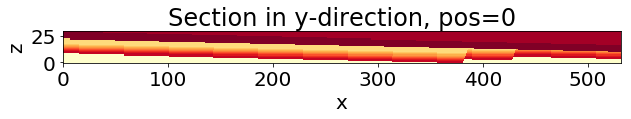

In [6]:
gipps_topo_ex.plot_section('y')

The base plot is not very useful - but we can create a section plot with a define vertical exaggeration (keyword ve) and plot the colorbar in horizontal orientation:

/Users/flow/git/pynoddy/pynoddy/output.py:464: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  section_slice = data[cell_pos,:,:].transpose()


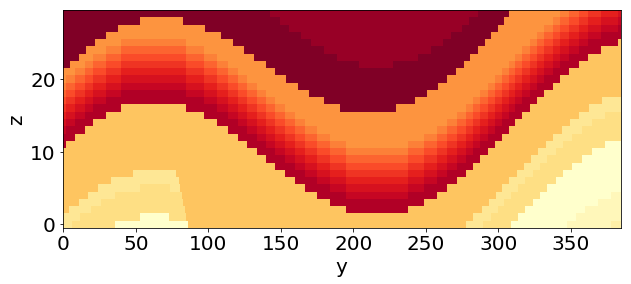

/Users/flow/git/pynoddy/pynoddy/output.py:473: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  section_slice = data[:,cell_pos,:].transpose()


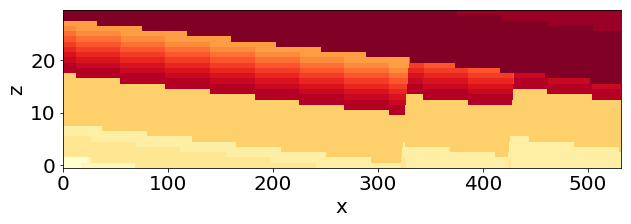

In [7]:
# gipps_topo_ex.determine_model_stratigraphy()
gipps_topo_ex.plot_section('x', ve = 5, position = 'centre',
                cmap = 'YlOrRd',
                title = '',
                colorbar = False)
gipps_topo_ex.plot_section('y', position = 100, ve = 5.,
                cmap = 'YlOrRd',
                title = '',
                colorbar_orientation = 'horizontal')

*Note: The names of the model stratigraphy (colorbar labels) are unfortunately not defined correctly in the input file - we need to fix that, then we should get useful labels, as well!*

## Loading parameters ranges from file

We now need to define the parameter ranges. This step can either be done through explicit definition in the notebook (see the previous notebook on the Experiment class), or a list of parameters and defined ranges plus statistics can be read in from a csv file. This enables the convenient parameter definition in a spreadsheed (for example through Excel).

In order to be read in correctly, the header should contain the labels:

- 'event' : event id
- 'parameter' : Noddy parameter ('Dip', 'Dip Direction', etc.)
- 'min' : minimum value
- 'max' : maximum value
- 'initial' : initial value

In addition, it is possible to define PDF type and parameters. For now, the following settings are supported:

- 'type' = 'normal' 
- 'stdev' : standard deviation
- 'mean' : mean value (default: 'initial' value)

We can read in the parameters simply with:

In [8]:
importlib.reload(pynoddy.experiment)
# the model itself is now part of the repository, in the examples directory:
history_file = os.path.join(repo_path, "examples/GBasin_Ve1_V4_b.his")
gipps_topo_ex = pynoddy.experiment.Experiment(history = history_file) 
gipps_topo_ex.load_parameter_file(os.path.join(repo_path, "examples/gipps_params_2.csv"))

## Generating random perturbations of the model



Before generating random prerturbations, we should now store the base version so that we can always revert to it at a later stage:

In [9]:
gipps_topo_ex.freeze()

For a reproducible experiment, we can also set the random seed:

In [10]:
gipps_topo_ex.set_random_seed(12345)

And now, let's perturb the model:

In [11]:
gipps_topo_ex.random_perturbation()

ValueError: object of too small depth for desired array

Let's see what happened: we can compare the new model to the base model as we stored it before:

In [ ]:
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
gipps_topo_ex.plot_section(ax = ax1, direction = 'x', model_type = "base", 
                           colorbar = False, title = "", ve = 5.)
gipps_topo_ex.plot_section(ax = ax2, direction = 'x', colorbar = False, 
                           title = "", ve = 5.)

In [ ]:
#
# Note: keep these lines only for debugging!
#
reload(pynoddy.output)
reload(pynoddy.history)
reload(pynoddy.experiment)
# the model itself is now part of the repository, in the examples directory:
history_file = os.path.join(repo_path, "examples/GBasin_Ve1_V4_b.his")
gipps_topo_ex = pynoddy.experiment.Experiment(history = history_file) 
gipps_topo_ex.load_parameter_file(os.path.join(repo_path, "examples/gipps_params.csv"))
# freeze base state
gipps_topo_ex.freeze()
# set seed
gipps_topo_ex.set_random_seed(12345)
# randomize
gipps_topo_ex.random_perturbation()

b1 = gipps_topo_ex.get_section('x', resolution = 50, model_type = 'base')
# b1.plot_section(direction = 'x', colorbar = False, title = "", ve = 5.)
b2 = gipps_topo_ex.get_section('x', resolution = 50, model_type = 'current')

In [ ]:
# b1.plot_section(direction = 'x', colorbar = True, title = "", ve = 5.)
b1 -= b2
# b1.plot_section(direction = 'x', colorbar = True, title = "", ve = 5.)
print np.min(b1.block), np.max(b1.block)

In [ ]:
type(b1)

...and another perturbation:

In [ ]:
gipps_topo_ex.random_perturbation()

In [ ]:
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
gipps_topo_ex.plot_section(ax = ax1, direction = 'x', model_type = "base", 
                           colorbar = False, title = "", ve = 5.)
gipps_topo_ex.plot_section(ax = ax2, direction = 'x', colorbar = False, 
                           title = "", ve = 5.)
# plot difference


In [ ]:
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
gipps_topo_ex.plot_section(ax = ax1, direction = 'x', model_type = "base", 
                           colorbar = False, title = "", ve = 5.)
gipps_topo_ex.plot_section(ax = ax2, direction = 'x', colorbar = False, 
                           title = "", ve = 5.)

In [ ]:
gipps_topo_ex.param_stats